# Veri Ön İşleme

###Metin Ön İşleme

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string

from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

# Pandas display settings
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

# Downloading sample dataset for NLP tasks
nltk.download('twitter_samples')

# Display file names from the dataset
for name in twitter_samples.fileids():
    print(f'File: {name}')

File: negative_tweets.json
File: positive_tweets.json
File: tweets.20150430-223406.json


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [ ]:
!pip install demoji
import demoji

# Load negative tweets and assign label 0
negative_tweets = twitter_samples.strings("negative_tweets.json")
df_neg = pd.DataFrame(negative_tweets, columns=['text'])
df_neg['label'] = 0

# Load positive tweets and assign label 1
positive_tweets = twitter_samples.strings("positive_tweets.json")
df_pos = pd.DataFrame(positive_tweets, columns=['text'])
df_pos['label'] = 1

# Combine both datasets and shuffle to avoid any ordering bias during training
df = pd.concat([df_pos, df_neg])
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

Dataset contains 10000 rows and 2 columns.


In [ ]:
df.head()

,text,label
0,when I have my own little apartment can like someone come live with me :-(,0
1,"Fall in love under a canopy of maple leaves! Secrets at Maple Syrup Farm is out now :) Happy Friday, all! xx http://t.co/fQeQlpk32A",1
2,Throwback :-)))) http://t.co/Tf4pHYRUDB,1
3,.@uberuk you cancelled my ice cream uber order. Everyone else in the office got it but me. :(,0
4,"@Catargiu Yeah, kinda feel like a warm butter in here :D",1


In [ ]:
df.text = df.text.str.lower()
df.head(5)

,text,label
0,when i have my own little apartment can like someone come live with me :-(,0
1,"fall in love under a canopy of maple leaves! secrets at maple syrup farm is out now :) happy friday, all! xx http://t.co/fqeqlpk32a",1
2,throwback :-)))) http://t.co/tf4phyrudb,1
3,.@uberuk you cancelled my ice cream uber order. everyone else in the office got it but me. :(,0
4,"@catargiu yeah, kinda feel like a warm butter in here :d",1


In [ ]:
# !https?://?S+|www\.\S+  bunları boşluk ile değiştir
df.text = df.text.str.replace(r'https?://\S+|www\.\S+', '', regex=True)
df.head()

,text,label
0,when i have my own little apartment can like someone come live with me :-(,0
1,"fall in love under a canopy of maple leaves! secrets at maple syrup farm is out now :) happy friday, all! xx",1
2,throwback :-)))),1
3,.@uberuk you cancelled my ice cream uber order. everyone else in the office got it but me. :(,0
4,"@catargiu yeah, kinda feel like a warm butter in here :d",1


In [ ]:
text = 'I have being trying to contact xyz via email to xyz@abc.co.in but there is no response.'
re.sub(r'\S+@\S+', '', text)

'I have being trying to contact xyz via email to  but there is no response.'

In [ ]:
text = "Today is 22/12/2020 and after two days on 24-12-2020 our vacation starts until 25th.09.2021"
re.sub(r'\d{1,2}(st|nd|rd|th)?[-./]\d{1,2}[-./]\d{2,4}', '', text)

'Today is  and after two days on  our vacation starts until '

In [ ]:
text = """
Below is a dummy html code.

    All the html opening and closing brackets should be remove.
    Company Site

"""
# regex
pattern = re.compile('<.*?>')
pattern.sub('', text)

'\nBelow is a dummy html code.\n\n    All the html opening and closing brackets should be remove.\n    Company Site\n\n'

In [ ]:

text = """
Below is a dummy html code.

    All the html opening and closing brackets should be remove.
    Company Site

"""
# Beautiful Soup
def remove_html(text):
    clean_text = BeautifulSoup(text).get_text()
    return clean_text

remove_html(text)

'Below is a dummy html code.\n\n    All the html opening and closing brackets should be remove.\n    Company Site\n\n'

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
text = "game is on 🔥🔥. Hilarious😂"
remove_emoji(text)

'game is on . Hilarious'

In [ ]:
# remove emojis from the text column
df.text = df.text.apply(lambda x: remove_emoji(x))

In [ ]:
EMOTICONS = {
    ":)": "smile",
    ":-)": "smile",
    ":D": "laugh",
    ":-D": "laugh",
    ":(": "sad",
    ":-(": "sad",
    ":'(": "crying",
    ";)": "wink",
    ";-)": "wink",
    ":P": "playful",
    ":-P": "playful",
    ":/": "skeptical",
    ":-/": "skeptical",
    ":|": "neutral",
    ":-|": "neutral",
    ":O": "surprised",
    ":-O": "surprised",
    ":*": "kiss",
    ":-*": "kiss"
}


In [ ]:
import re

def remove_emoticons(text):
    emoticons_pattern = re.compile('|'.join(re.escape(k) for k in EMOTICONS.keys()))
    return emoticons_pattern.sub('', text)

In [ ]:
remove_emoticons("Hello :->")

'Hello :->'

In [ ]:
# remove emoticons from the text column
df.text = df.text.apply(lambda x: remove_emoticons(x))

In [ ]:
def emoji_to_words(text):
    return demoji.replace_with_desc(text, sep="__")

In [ ]:
text = "game is on 🔥 🚣🏼"
emoji_to_words(text)

'game is on __fire__ __person rowing boat: medium-light skin tone__'

In [ ]:
def emoticons_to_words(text):
    for emot in EMOTICONS:
        safe_emot = re.escape(emot)
        replacement = "_".join(EMOTICONS[emot].lower().split())
        text = re.sub(safe_emot, replacement, text)
    return text

In [ ]:
text = "Hey there!! :-)"
emoticons_to_words(text)

'Hey there!! smile'

In [ ]:
def remove_tags_mentions(text):
    pattern = re.compile(r'(@\S+|#\S+)')
    return pattern.sub('', text)

In [ ]:
text = "live @flippinginja on #younow - jonah and jareddddd"
remove_tags_mentions(text)

'live  on  - jonah and jareddddd'

In [ ]:
# remove hashtags and user mentions from the text
df.text = df.text.apply(lambda x: remove_tags_mentions(x))

In [ ]:
PUNCTUATIONS = string.punctuation # punctutation - noktalama işaretleri

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCTUATIONS))

In [ ]:
df.text = df["text"].apply(lambda text: remove_punctuation(text))

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in STOPWORDS])

In [ ]:
df.text = df.text.apply(lambda text: remove_stopwords(text))
df.head()

,text,label
0,little apartment like someone come live,0
1,fall love canopy maple leaves secrets maple syrup farm happy friday xx,1
2,throwback,1
3,cancelled ice cream uber order everyone else office got,0
4,yeah kinda feel like warm butter,1


In [ ]:
def remove_whitespaces(text):
    return " ".join(text.split())

In [ ]:
text = "  Whitespaces in the beginning are removed  \t as well \n  as in between  the text   "

clean_text = " ".join(text.split())
clean_text

'Whitespaces in the beginning are removed as well as in between the text'

In [ ]:
df.text = df.text.apply(lambda x: remove_whitespaces(x))

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

In [ ]:
df['text_stemmed'] = df.text.apply(lambda text: stem_words(text))
df[['text', 'text_stemmed']].head()

,text,text_stemmed
0,little apartment like someone come live,littl apart like someon come live
1,fall love canopy maple leaves secrets maple syrup farm happy friday xx,fall love canopi mapl leav secret mapl syrup farm happi friday xx
2,throwback,throwback
3,cancelled ice cream uber order everyone else office got,cancel ice cream uber order everyon els offic got
4,yeah kinda feel like warm butter,yeah kinda feel like warm butter


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()

def text_lemmatize(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [ ]:
df['text_lemmatized'] = df.text.apply(lambda text: text_lemmatize(text))
df[['text', 'text_stemmed', 'text_lemmatized']].head()

,text,text_stemmed,text_lemmatized
0,little apartment like someone come live,littl apart like someon come live,little apartment like someone come live
1,fall love canopy maple leaves secrets maple syrup farm happy friday xx,fall love canopi mapl leav secret mapl syrup farm happi friday xx,fall love canopy maple leaf secret maple syrup farm happy friday xx
2,throwback,throwback,throwback
3,cancelled ice cream uber order everyone else office got,cancel ice cream uber order everyon els offic got,cancelled ice cream uber order everyone else office got
4,yeah kinda feel like warm butter,yeah kinda feel like warm butter,yeah kinda feel like warm butter


In [ ]:
!pip install pyspellchecker

In [ ]:
from spellchecker import SpellChecker

In [ ]:
manual_corrections = {
    "hw": "how",
    "wht": "what",
    "wat": "what",
    "u": "you",
    "ur": "your",
    "r": "are",
    "pls": "please",
    "plz": "please",
    "thx": "thanks",
    "thnks": "thanks",
    "ty": "thank you",
    "imo": "in my opinion",
    "idk": "i don't know",
    "btw": "by the way",
    "omg": "oh my god",
    "l8r": "later",
    "cuz": "because",
    "bcoz": "because",
    "bcz": "because",
    "n": "and",
    "doin": "doing",
    "wanna": "want to",
    "gonna": "going to",
    "gotta": "got to",
    "gud": "good",
    "im": "i'm",
    "dont": "don't",
    "cant": "can't",
    "wont": "won't",
    "didnt": "didn't",
    "hes": "he's",
    "shes": "she's",
    "ive": "i've",
    "ill": "i'll",
    "id": "i'd",
    "didnt": "didn't"
}


In [ ]:
from spellchecker import SpellChecker
spell = SpellChecker()

import string

def correct_spelling(text):
    # Remove punctuation for better spell correction
    text_cleaned = text.translate(str.maketrans('', '', string.punctuation))

    correct_text = []
    misspelled_words = spell.unknown(text_cleaned.split())

    for word in text_cleaned.split():
        lower_word = word.lower()
        if lower_word in manual_corrections:
            correct_text.append(manual_corrections[lower_word])
        elif lower_word in misspelled_words:
            correct_text.append(spell.correction(lower_word))
        else:
            correct_text.append(word)

    return " ".join(correct_text)


In [ ]:
text = "Hi, hwo are you doin? I'm good thnks for asking"
correct_spelling(text)

"Hi how are you doing i'm good thanks for asking"

In [ ]:
text = "hw are you doin? I'm god thnks"
correct_spelling(text)

"how are you doing i'm god thanks"

#Öz Nitelik Çıkarımı

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


categories = ['teacher', 'nurse', 'police','doctor']
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(categories)
df = pd.DataFrame({'Meslek': categories, 'Etiket':encoded_labels})

In [ ]:
df.head()

,Meslek,Etiket
0,teacher,3
1,nurse,1
2,police,2
3,doctor,0


###One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
categories = ['teacher', 'nurse', 'police','doctor']
data = pd.DataFrame({'Meslek': categories})
encoder = OneHotEncoder(sparse_output= False,dtype =int)
encoded_data = encoder.fit_transform(data)
encoded_df   = pd.DataFrame(encoded_data, columns = categories)

In [ ]:
encoded_df.head()

,teacher,nurse,police,doctor
0,0,0,0,1
1,0,1,0,0
2,0,0,1,0
3,1,0,0,0


###Count Vectorization

In [ ]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Example documents in Turkish
documents = [
    'This is the first document',
    'This is the second document',
    'And here is the third one',
    'Which one is the first document'
]

# Create a DataFrame
data = pd.DataFrame({'Text': documents})

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_vector = vectorizer.fit_transform(data['Text'])

# Convert the TF-IDF matrix to a DataFrame for easier viewing
tfidf_vector = pd.DataFrame(tfidf_vector.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
tfidf_vector.head()

,and,document,first,here,is,one,second,the,third,this,which
0,0.000000,0.430800,0.532124,0.000000,0.352207,0.000000,0.000000,0.352207,0.000000,0.532124,0.000000
1,0.000000,0.397871,0.000000,0.000000,0.325285,0.000000,0.623342,0.325285,0.000000,0.491450,0.000000
2,0.489924,0.000000,0.000000,0.489924,0.255662,0.386261,0.000000,0.255662,0.489924,0.000000,0.000000
3,0.000000,0.357079,0.441064,0.000000,0.291936,0.441064,0.000000,0.291936,0.000000,0.000000,0.559434


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from nltk.tokenize import word_tokenize

from sklearn.decomposition import NMF, PCA

from sklearn.manifold import TSNE

import spacy

###TF-IDF

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
text = "Doğal dil işleme bilgisayar bilimi altalanıdır" \
        "yapay zeka ve hasaplamalı bilmidir" \
        "Bilgisayar ve insan dili kesişimidir"

# token : metnin içindeki en anlamlı parça
tokens = word_tokenize(text)

print(len(text),tokens[:50])

# TF-IDF
tfidf_vec = TfidfVectorizer()
X_tfidf = tfidf_vec.fit_transform([text])
print('TF-IDF:')
print(tfidf_vec.get_feature_names_out()[:50])
print(X_tfidf.toarray()[0][:50])

116 ['Doğal', 'dil', 'işleme', 'bilgisayar', 'bilimi', 'altalanıdıryapay', 'zeka', 've', 'hasaplamalı', 'bilmidirBilgisayar', 've', 'insan', 'dili', 'kesişimidir']
TF-IDF:
['altalanıdıryapay' 'bilgisayar' 'bilimi' 'bilmidirbilgisayar' 'dil'
 'dili' 'doğal' 'hasaplamalı' 'insan' 'işleme' 'kesişimidir' 've' 'zeka']
[0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.5  0.25]


###Bag Of Words (BOW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
documents = ['Bu ilk belgedir',
            'İkinci belge budur',
            'Ve ücüncü belgemiz',
            'İlk belge hangisidir']

data = pd.DataFrame({'Text':documents})
vectorizer = CountVectorizer()
bow_vectors = vectorizer.fit_transform(data['Text'])

bow_df = pd.DataFrame(bow_vectors.toarray(), columns = vectorizer.get_feature_names_out())

In [ ]:
bow_df.head()

,belge,belgedir,belgemiz,bu,budur,hangisidir,ilk,kinci,lk,ve,ücüncü
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,1,1
3,1,0,0,0,0,1,0,0,1,0,0


###Cbow

In [ ]:
!pip install --force-reinstall gensim
import pandas as pd
from gensim.models import Word2Vec

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

In [ ]:
sentences = [["Ben", "severim", "elmaları"],
            ["Ben", "yerim", "meyve"],
            ['elmalar', "lezzetlidir"],
            ['meyveler','sağlar','vitamin']]

cbow = Word2Vec(sentences,min_count=1 , vector_size=300,sg=0)
vectors = cbow.wv

vector_df = pd.DataFrame(vectors.vectors, index = vectors.index_to_key)

In [ ]:
vector_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
Ben,-0.000179,0.000079,0.001701,0.003003,-0.003101,-0.002372,0.002153,0.002991,-0.001672,-0.001254,0.002460,-0.000511,-0.001512,0.002185,-0.001620,-0.000605,0.000959,0.000331,-0.002762,-0.003150,0.002437,0.001690,0.002253,0.000254,0.002117,-0.001135,-0.000315,0.001923,-0.002507,-0.001312,-0.002504,-0.000310,0.003179,-0.002440,-0.000778,-0.000646,0.002692,-0.001977,0.000015,-0.001585,-0.003201,0.001669,-0.002920,-0.001464,-0.000012,-0.000099,-0.002554,0.003205,0.001661,0.003078,-0.002719,0.001499,-0.001379,0.000275,0.002833,-0.001487,0.001506,-0.002262,-0.001183,0.003133,-0.000526,0.000107,-0.001380,-0.002561,-0.000503,0.000823,-0.000296,0.001845,-0.000914,0.000753,0.001819,0.002782,-0.000485,-0.003069,0.001457,0.000191,0.002481,-0.000271,-0.000879,-0.002918,-0.000286,0.000942,0.001800,0.002351,-0.001901,0.000620,0.002030,-0.001599,-0.001036,0.002266,0.000544,0.000063,0.001158,0.000073,0.003206,0.001687,-0.002972,-0.002347,0.000300,0.002131,-0.002873,0.001222,0.001730,0.001914,0.002489,-0.002056,0.000369,0.002016,-0.000947,-0.002058,-0.000137,-0.002790,-0.001867,0.002368,0.001118,0.002409,0.002267,0.002510,-0.001263,-0.000187,0.000783,-0.001506,0.002796,-0.003286,0.002255,0.000971,-0.001644,0.001466,-0.000580,0.002237,0.003322,-0.001454,-0.000200,-0.001899,0.001284,0.000929,0.002297,0.002034,0.003179,0.003091,0.002633,-0.002330,-0.003052,-0.000119,-0.001033,0.002631,0.001980,-0.000515,0.000504,0.000597,0.002606,-0.003170,-0.000069,0.001156,-0.000313,0.002794,0.003004,0.002179,-0.000237,0.002570,-0.002845,0.001069,-0.001546,-0.001696,0.001197,0.001790,0.002590,-0.001922,0.002478,0.002208,-0.001237,-0.002915,0.001812,0.002170,-0.000263,-0.002237,-0.002362,-0.000832,0.001714,-0.001222,-0.003123,0.001276,0.001628,-0.002143,0.000403,-0.000692,0.000008,-0.003295,0.000897,-0.001583,0.000363,-0.000525,0.000732,-0.002627,-0.000906,0.000888,0.001782,-0.000797,-0.003170,0.001502,0.000032,0.001026,-0.002271,-0.000458,0.002556,0.002449,-0.001224,0.000881,-0.002772,0.002068,-0.001546,-0.001055,0.003104,0.000291,0.002497,-0.002025,0.001720,0.003308,-0.002819,-0.001712,-0.002355,-0.001621,-1.259521e-03,-0.002845,0.002652,-0.001615,0.002808,0.001754,-0.002183,0.001319,0.001823,-0.002476,-0.002469,-0.000825,-0.002875,-0.000527,-0.000134,0.001100,0.000481,-0.000294,-0.001865,0.000577,-0.000299,0.002265,0.001325,0.001510,0.000478,-0.000900,-0.001456,-0.000344,0.000479,-0.000882,-0.002358,-0.002602,-0.003041,-0.001978,-0.000616,-0.001441,-0.002154,-0.001239,0.001430,-0.001246,0.002793,0.000511,-0.002414,0.003145,0.002544,0.001831,-0.002283,0.001941,0.001336,0.001728,0.001419,0.000647,-0.001057,0.002785,0.003204,0.001264,-0.000946,0.000002,0.000406,-0.002819,-0.002741,-0.000077,0.000412,-0.001914,-0.001575,-0.002449,0.002776,0.000040,-0.001503,0.001901,0.003060,-0.001367,0.002655,0.001792,0.001960,0.000171,0.002738,-0.002340
vitamin,-0.002748,0.003100,-0.000066,-0.000656,0.001535

###Skip gram


In [ ]:
import pandas as pd
from gensim.models import Word2Vec

In [ ]:
sentences = [["Ben", "severim", "elmaları"],
            ["Ben", "yerim", "meyve"],
            ['elmalar', "lezzetlidir"],
            ['meyveler','sağlar','vitamin']]

skip_gram = Word2Vec(sentences,min_count=1 , vector_size=300,sg=1)
vectors = skip_gram.wv

vector_df = pd.DataFrame(vectors.vectors, index = vectors.index_to_key)

In [ ]:
vector_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
Ben,-0.000179,0.000079,0.001701,0.003003,-0.003101,-0.002372,0.002153,0.002991,-0.001672,-0.001254,0.002460,-0.000511,-0.001512,0.002185,-0.001620,-0.000605,0.000959,0.000331,-0.002762,-0.003150,0.002437,0.001690,0.002253,0.000254,0.002117,-0.001135,-0.000315,0.001923,-0.002507,-0.001312,-0.002504,-0.000310,0.003179,-0.002440,-0.000778,-0.000646,0.002692,-0.001977,0.000015,-0.001585,-0.003201,0.001669,-0.002920,-0.001464,-0.000012,-0.000099,-0.002554,0.003205,0.001661,0.003078,-0.002719,0.001499,-0.001379,0.000275,0.002833,-0.001487,0.001506,-0.002262,-0.001183,0.003133,-0.000526,0.000107,-0.001380,-0.002561,-0.000503,0.000823,-0.000296,0.001845,-0.000914,0.000753,0.001819,0.002782,-0.000485,-0.003069,0.001457,0.000191,0.002481,-0.000271,-0.000879,-0.002918,-0.000286,0.000942,0.001800,0.002351,-0.001901,0.000620,0.002030,-0.001599,-0.001036,0.002266,0.000544,0.000063,0.001158,0.000073,0.003206,0.001687,-0.002972,-0.002347,0.000300,0.002131,-0.002873,0.001222,0.001730,0.001914,0.002489,-0.002056,0.000369,0.002016,-0.000947,-0.002058,-0.000137,-0.002790,-0.001867,0.002368,0.001118,0.002409,0.002267,0.002510,-0.001263,-0.000187,0.000783,-0.001506,0.002796,-0.003286,0.002255,0.000971,-0.001644,0.001466,-0.000580,0.002237,0.003322,-0.001454,-0.000200,-0.001899,0.001284,0.000929,0.002297,0.002034,0.003179,0.003091,0.002633,-0.002330,-0.003052,-0.000119,-0.001033,0.002631,0.001980,-0.000515,0.000504,0.000597,0.002606,-0.003170,-0.000069,0.001156,-0.000313,0.002794,0.003004,0.002179,-0.000237,0.002570,-0.002845,0.001069,-0.001546,-0.001696,0.001197,0.001790,0.002590,-0.001922,0.002478,0.002208,-0.001237,-0.002915,0.001812,0.002170,-0.000263,-0.002237,-0.002362,-0.000832,0.001714,-0.001222,-0.003123,0.001276,0.001628,-0.002143,0.000403,-0.000692,0.000008,-0.003295,0.000897,-0.001583,0.000363,-0.000525,0.000732,-0.002627,-0.000906,0.000888,0.001782,-0.000797,-0.003170,0.001502,0.000032,0.001026,-0.002271,-0.000458,0.002556,0.002449,-0.001224,0.000881,-0.002772,0.002068,-0.001546,-0.001055,0.003104,0.000291,0.002497,-0.002025,0.001720,0.003308,-0.002819,-0.001712,-0.002355,-0.001621,-1.259521e-03,-0.002845,0.002652,-0.001615,0.002808,0.001754,-0.002183,0.001319,0.001823,-0.002476,-0.002469,-0.000825,-0.002875,-0.000527,-0.000134,0.001100,0.000481,-0.000294,-0.001865,0.000577,-0.000299,0.002265,0.001325,0.001510,0.000478,-0.000900,-0.001456,-0.000344,0.000479,-0.000882,-0.002358,-0.002602,-0.003041,-0.001978,-0.000616,-0.001441,-0.002154,-0.001239,0.001430,-0.001246,0.002793,0.000511,-0.002414,0.003145,0.002544,0.001831,-0.002283,0.001941,0.001336,0.001728,0.001419,0.000647,-0.001057,0.002785,0.003204,0.001264,-0.000946,0.000002,0.000406,-0.002819,-0.002741,-0.000077,0.000412,-0.001914,-0.001575,-0.002449,0.002776,0.000040,-0.001503,0.001901,0.003060,-0.001367,0.002655,0.001792,0.001960,0.000171,0.002738,-0.002340
vitamin,-0.002748,0.003100,-0.000066,-0.000656,0.001535

###N-gram features

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:

documents = ["Bu ilk belgedir.",
             "İkinci belge budur.",
             "Ve üçüncü belgemiz.",
             "İlk belge hangisidir?"]

data = pd.DataFrame({'Text': documents})
ngram = CountVectorizer(ngram_range=(2,3))
ngram_vectors = ngram.fit_transform(data['Text'])
ngram_df = pd.DataFrame(ngram_vectors.toarray(), columns=ngram.get_feature_names_out())

In [ ]:
ngram_df.head()

,belge budur,belge hangisidir,bu ilk,bu ilk belgedir,ilk belgedir,kinci belge,kinci belge budur,lk belge,lk belge hangisidir,ve üçüncü,ve üçüncü belgemiz,üçüncü belgemiz
0,0,0,1,1,1,0,0,0,0,0,0,0
1,1,0,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,1,1
3,0,1,0,0,0,0,0,1,1,0,0,0


#Model

In [ ]:
import nltk
from nltk.corpus import twitter_samples

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
import re
import pandas as pd

In [ ]:
negative_tweets = twitter_samples.strings("negative_tweets.json")
df_neg = pd.DataFrame(negative_tweets, columns = ['text'])
df_neg['label'] = 0

In [ ]:
positive_tweets = twitter_samples.strings("positive_tweets.json")
df_pos = pd.DataFrame(positive_tweets, columns = ['text'])
df_pos['label'] = 1

In [ ]:
df = pd.concat([df_neg,df_pos])
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head(10)

,text,label
0,Missing you :(,0
1,@VyenAngel gosh its cheaper in malaysia :( here its worth 130 +shipping,0
2,@RuneScape @OldSchoolRS on OldSchool Runescape :),1
3,@shokako1104 I'm sorry :( ! What is hypercholesteloremia ? Are you ok ?,0
4,@hclcampbell Amazing! Glad to hear we could make your Friday morning a little better :-) ^KS,1
5,It sucks so much been sick i was plan to start work on my first gundam to night but nope. :(,0
6,I can never go to sleep early :( lol,0
7,"@iamsrk Lol. That look's like a scary room! Ghost story or murder mystery? Either way, just try it and get done asap :p",1
8,"I just remembered my ""Oh my God Frank Iero"" phase. :D",1
9,Gagal total :(( My #TeenChoice for #ChoiceInternationalArtist is #SuperJunior!,0


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Metin Temizleme
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # URL'leri kaldır
    text = re.sub(r'\@\w+|\#', '', text)  # Kullanıcı adlarını ve hashtagleri kaldır
    text = re.sub(r'[^\w\s]', '', text)  # Özel karakterleri kaldır
    return text

# Metni Küçük Harfe Dönüştürme
def lowercase(text):
    return text.lower()

# Tokenization
def tokenize(text):
    return word_tokenize(text)

# Stopwords Temizleme
def remove_stopwords(tokens):
    stopwords_english = set(stopwords.words('english'))
    return [word for word in tokens if word not in stopwords_english]

# Stemming
def stem(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

# Tüm Veri Ön İşleme Adımlarını Uygula
def preprocess(text):
    text = clean_text(text)
    text = lowercase(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = stem(tokens)
    return ' '.join(tokens)  # Token'ları birleştirerek temizlenmiş metni döndür

# Ön İşleme Adımlarını Tüm DataFrame'e Uygula
df['text_cleaned'] = df['text'].apply(preprocess)


In [ ]:
df.head()

,text,label,text_cleaned
0,Missing you :(,0,miss
1,@VyenAngel gosh its cheaper in malaysia :( here its worth 130 +shipping,0,gosh cheaper malaysia worth 130 ship
2,@RuneScape @OldSchoolRS on OldSchool Runescape :),1,oldschool runescap
3,@shokako1104 I'm sorry :( ! What is hypercholesteloremia ? Are you ok ?,0,im sorri hypercholesteloremia ok
4,@hclcampbell Amazing! Glad to hear we could make your Friday morning a little better :-) ^KS,1,amaz glad hear could make friday morn littl better ks


In [ ]:
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

In [ ]:
word = FreqDist(df['text_cleaned'])
wordcloud = WordCloud(width= 400, height=200,
        background_color= 'white').generate_from_frequencies(word)

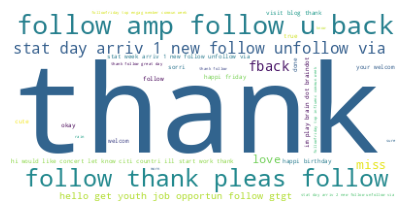

In [ ]:
plt.figure(figsize=(5,3))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = vectorizer.fit_transform(df['text_cleaned'])
feature_names = vectorizer.get_feature_names_out()
print("td Idf matris: ",tfidf_matrix.shape)

td Idf matris:  (10000, 10000)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(tfidf_matrix,
                        df['label'], test_size = 0.2, random_state=42)

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [ ]:
print("knn sonuçları")
print("Doğruluk: ",accuracy_score(y_test,y_pred))
print("F1: ",f1_score(y_test,y_pred))
print("Hassasiyet",recall_score(y_test,y_pred))
print("Kesinlik",precision_score(y_test,y_pred))

knn sonuçları
Doğruluk:  0.5935
F1:  0.3928304705003734
Hassasiyet 0.263
Kesinlik 0.775811209439528


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

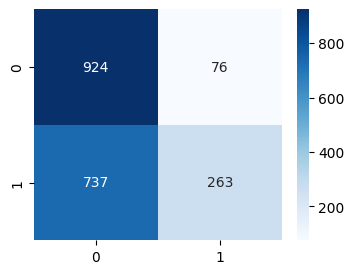

In [ ]:
cm = confusion_matrix(y_test ,y_pred)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot= True, fmt='d', cmap = 'Blues')

In [ ]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 150)
clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)


In [ ]:

print("Random Forest sonuçları")
print("Doğruluk: ",accuracy_score(y_test,y_pred_clf))
print("F1: ",f1_score(y_test,y_pred_clf))
print("Hassasiyet",recall_score(y_test,y_pred_clf))
print("Kesinlik",precision_score(y_test,y_pred_clf))

Random Forest sonuçları
Doğruluk:  0.731
F1:  0.6994413407821229
Hassasiyet 0.626
Kesinlik 0.7924050632911392


<Axes: >

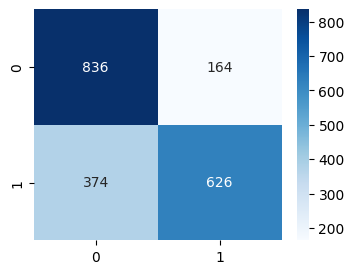

In [ ]:
cm = confusion_matrix(y_test ,y_pred_clf)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot= True, fmt='d', cmap = 'Blues')


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:

print("LR sonuçları")
print("Doğruluk: ",accuracy_score(y_test,y_pred_lr))
print("F1: ",f1_score(y_test,y_pred_lr))
print("Hassasiyet",recall_score(y_test,y_pred_lr))
print("Kesinlik",precision_score(y_test,y_pred_lr))

LR sonuçları
Doğruluk:  0.749
F1:  0.7329787234042553
Hassasiyet 0.689
Kesinlik 0.7829545454545455


<Axes: >

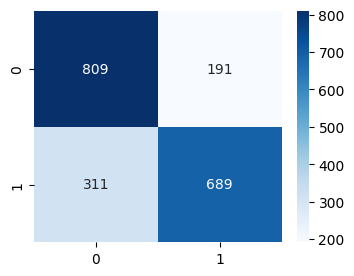

In [ ]:
cm = confusion_matrix(y_test ,y_pred_lr)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot= True, fmt='d', cmap = 'Blues')

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
print("SVM sonuçları")
print("Doğruluk: ",accuracy_score(y_test,y_pred_svm))
print("F1: ",f1_score(y_test,y_pred_svm))
print("Hassasiyet",recall_score(y_test,y_pred_svm))
print("Kesinlik",precision_score(y_test,y_pred_svm))


SVM sonuçları
Doğruluk:  0.7565
F1:  0.7432788613600422
Hassasiyet 0.705
Kesinlik 0.7859531772575251


<Axes: >

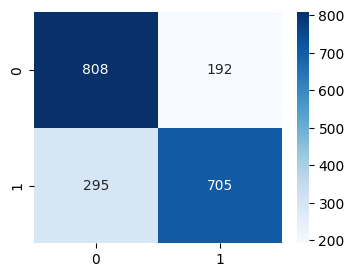

In [ ]:
cm = confusion_matrix(y_test ,y_pred_svm)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot= True, fmt='d', cmap = 'Blues')